In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
df=pd.read_csv("diabetes.csv")

##**Showig First N values of the dataset**


In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##**To find number of unique values**

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

##**Finding proportion of each outcome value**

In [9]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

##**Finding no. of values that are zero**

In [10]:
(df[df.columns]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

replace all 0's with median

In [11]:
for i in ["Glucose","BloodPressure","Insulin","BMI"]:
  df[i].replace(to_replace = 0, value = df[i].median(), inplace=True)

In [12]:
(df[df.columns]==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

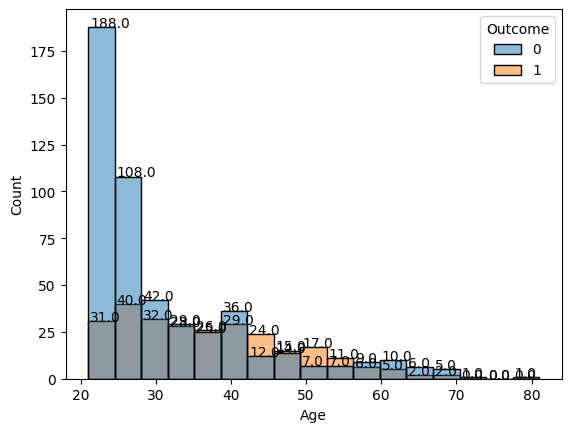

In [52]:
ax=sns.histplot(x=df.Age,data=df,hue=df.Outcome)
for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

**women with diabetes are predominantly in age group of 22 to 35 age bracket.  as age increases the frequency of women with diabetes decreases**


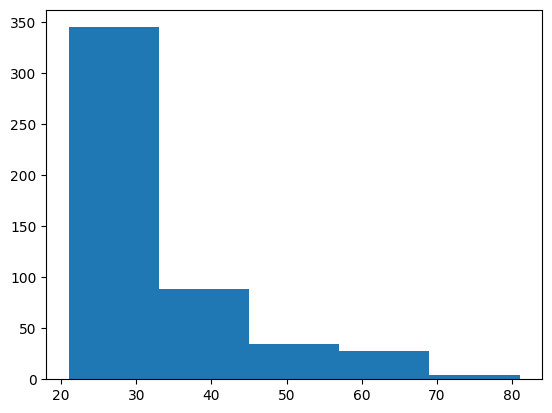

In [15]:
plt.hist(df[df["Outcome"]==0]["Age"],bins=5)
plt.show()

 **Women without diabetes are predominantly in age group of 22 to 35 age bracket. this is bracket also has highest diabetes risk among women**

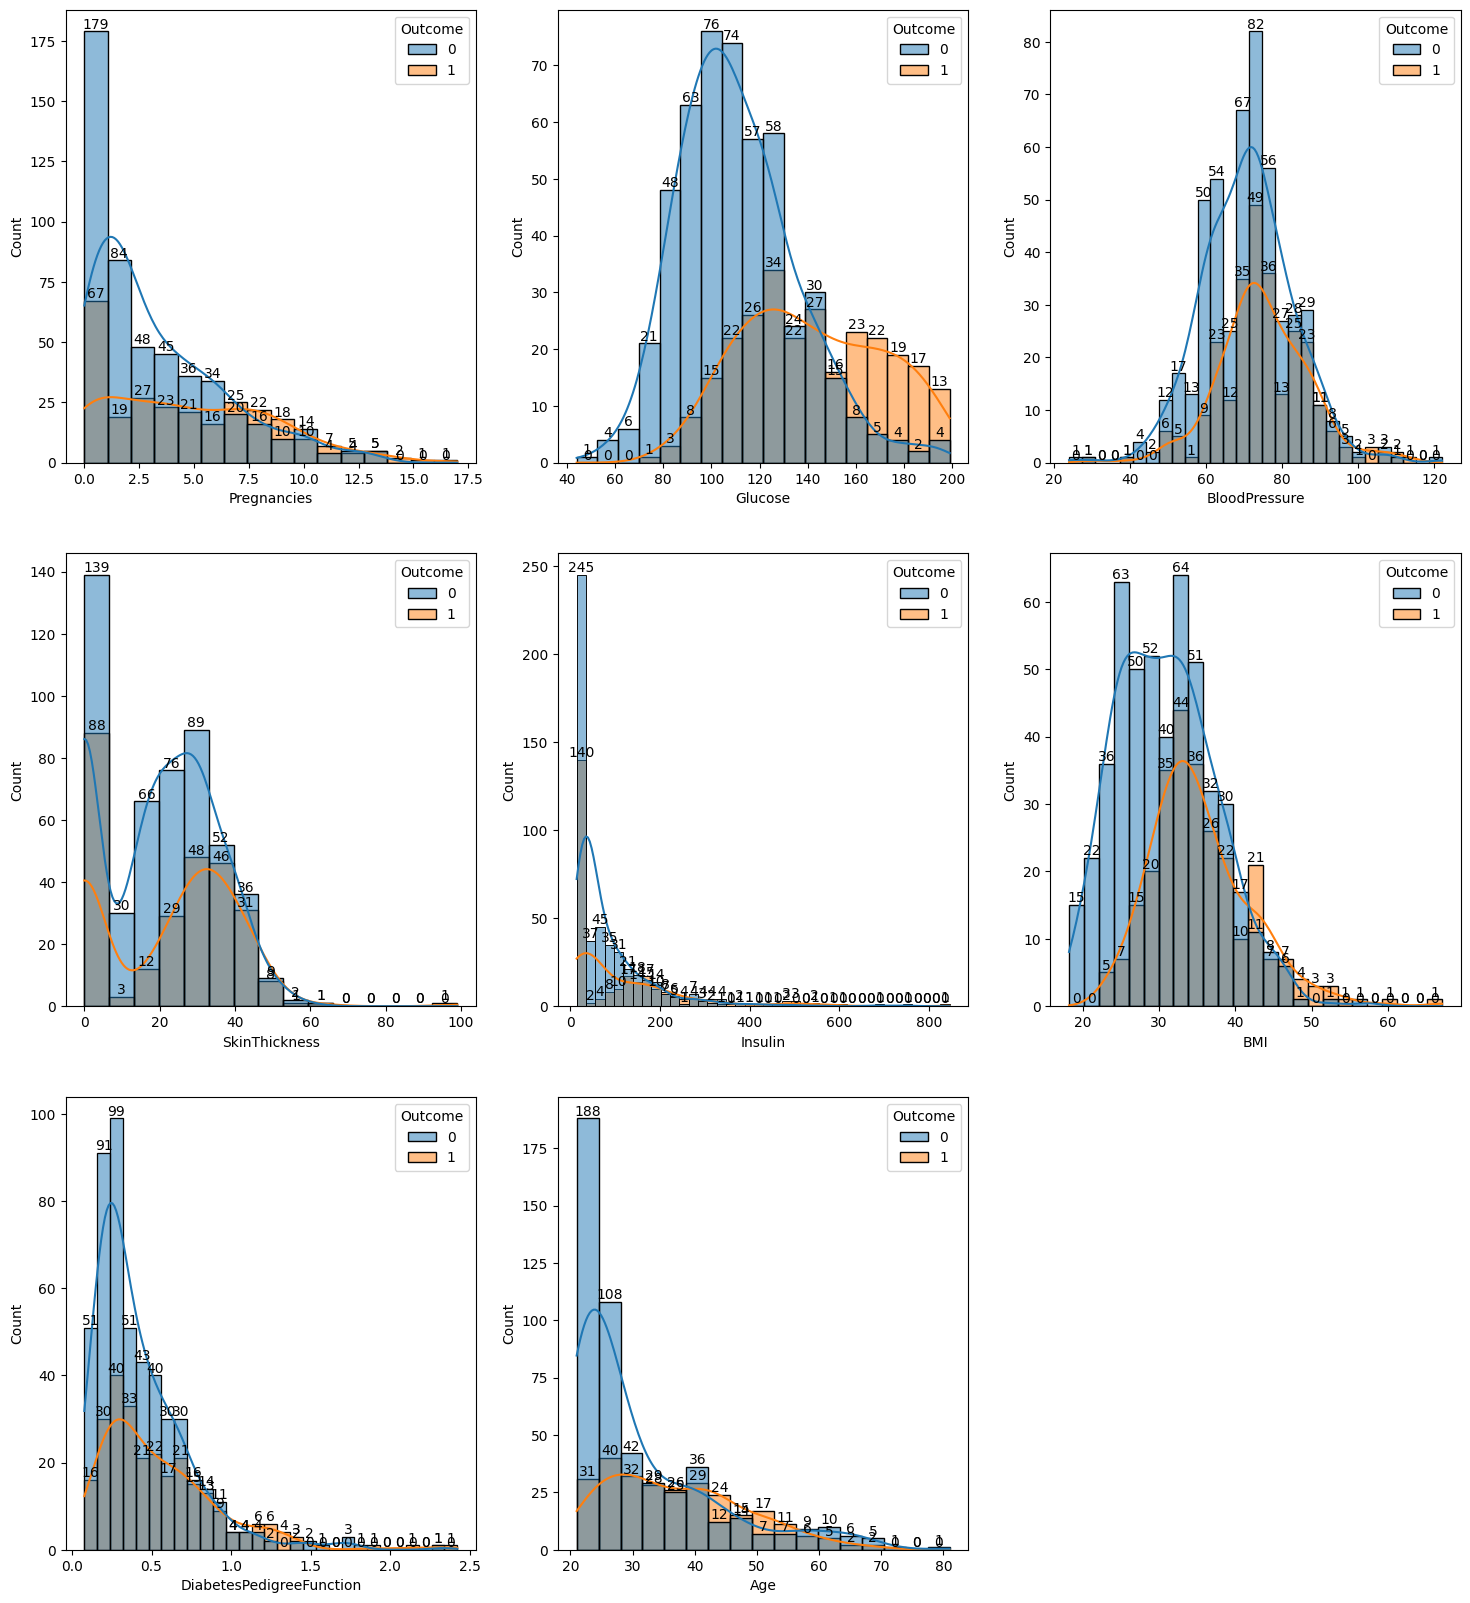

In [67]:
pno=1
plt.figure(figsize=(18,20))
for i in df.columns:
    if pno<9:
        plt.subplot(3,3,pno)
        ax=sns.histplot(x=i,data=df,hue=df.Outcome,kde=True)
        plt.xlabel(i)
        pno+=1
        for i in ax.containers:
              ax.bar_label(i,)

This pridicts that internal factor that are causing diabities are **Insulin**,**BMI**, **Glucose** and external features are **Pregnensies** and **Age**



In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,-0.081672,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.074455,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.007937,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074455,0.007937,1.000000,0.397161,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.055697,0.357573,-0.028721,0.397161,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.381740,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.183928,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,-0.113970,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.074752,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

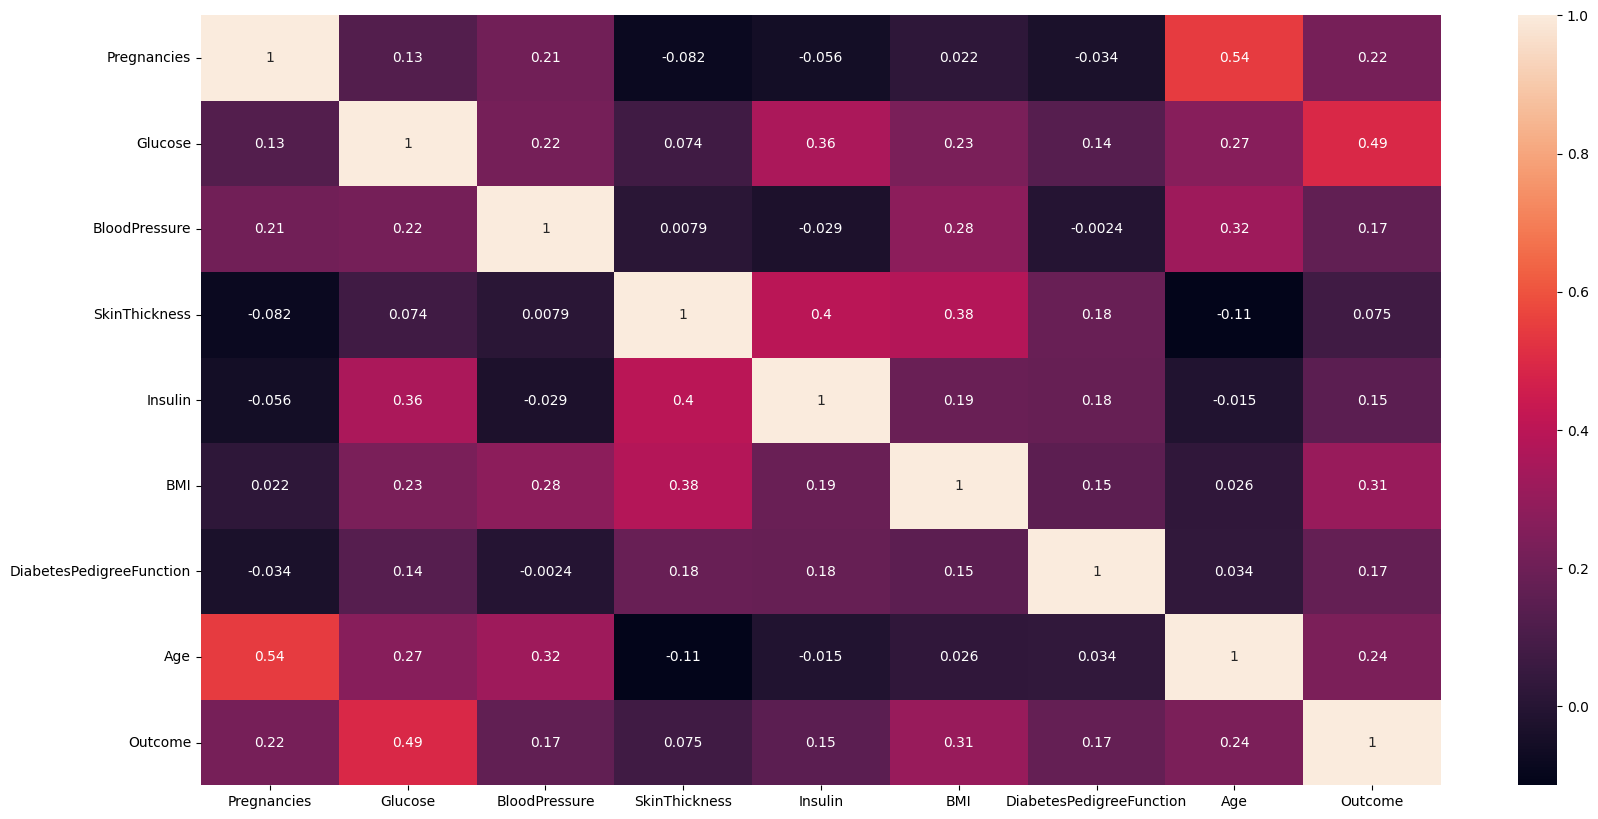

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

**Drawn  states that most important factors are BMI, age , pregnancy, glucose, insulin. The least important features are skin thickness and blood pressure.**

**1. maintain a healthy BMI to prevent high glucose and insulin level**

**2. glucose and insulin level as you get older**

**3. if you are pregnant be careful about your glucose and insulin levels.**

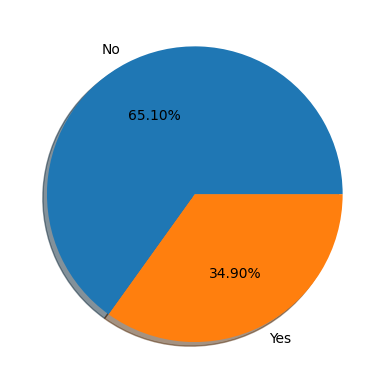

In [60]:
plt.pie(x=df["Outcome"].value_counts(),data=df,autopct="%1.2f%%",labels=["No","Yes"],shadow=True)
plt.show()

**The following factors affect the risk of diabetes, according to the data analysis:**

1. Pregnancies: More pregnancies mean higher diabetes risk.
2. Glucose: Diabetes is more likely with high glucose levels (above 140).
3. Blood pressure: Blood pressure between 60 and 90 has more diabetic people than other ranges.
4. Skin thickness: Skin thickness makes diabetes more likely.
5. Insulin: Insulin levels influence diabetes, and higher insulin levels increase the diabetes pol
6. BMI: Higher BMI (above 30) increases the risk of diabetes.
7. Age: Age makes diabetes more likely.